# **Many-to-One LSTM for Sentiment Analysis and Text Generation**

This project delves into sentiment analysis and text generation using Long Short-Term Memory (LSTM) neural networks. We'll start by training an LSTM model to analyze airline sentiments. The dataset contains sentiment labels (0 or 1) and text reviews, which we'll convert into numerical data using the bag-of-words technique. Then, we'll use a many-to-one LSTM architecture to predict sentiment labels from the text.

Moving on, we'll explore text generation by training LSTMs on "Alice's Adventures in Wonderland." These LSTMs will learn the text patterns to generate new text based on a given prompt, focusing on next-word prediction for coherent sentences.

Throughout this project, we'll tackle challenges like the dynamic nature of language and words with similar meanings. Techniques such as entropy scaling and softmax temperature will help control text randomness.

By the end of this project, you'll:

## **Learning Outcomes**

* Understand sentiment analysis and its significance in analyzing textual data.
* Learn essential text preprocessing techniques.
* Grasp the bag-of-words technique for numerical representation.
* Implement LSTM for sentiment analysis.
* Train and evaluate LSTM models for sentiment classification.
* Explore text generation using LSTMs.
* Recognize the challenges of text generation and how to address them.
* Discover entropy scaling and softmax temperature for controlling text generation.
* Develop skills in next-word prediction and generating coherent sentences.
* Use this project as a foundation for further exploration in sentiment analysis, text generation, and deep learning with LSTMs.

---


## **Approach**

### Sentiment Analysis:

* **Dataset:**
    - Acquire the airline sentiment dataset containing sentiment labels (0 or 1) and associated text reviews.

* **Preprocessing:**
    - Perform data preprocessing, including text cleaning, tokenization, and stop words removal.
    - Transform text reviews into a bag-of-words representation.

* **Many-to-One LSTM:**
    - Employ the many-to-one LSTM architecture for training the sentiment detection model.
    - Feed the bag-of-words representation of text reviews as input to the LSTM.

* **Training:**
    - Split the dataset into training and testing sets.
    - Train the LSTM model using the training set.
    - Evaluate the model's performance on the testing set.

### Text Generation:

* **Dataset:**
    - Obtain the "Alice's Adventures in Wonderland" text dataset.

* **Preparing and Structuring:**
    - Preprocess the text data by cleaning, tokenizing, and structuring sentences and phrases.
    - Create sequences for training.

* **Many-to-One LSTM:**
    - Implement the many-to-one LSTM architecture for text generation.
    - Train the LSTM model using the prepared dataset.

* **The Challenge of Text Generation:**
    - Recognize the challenges in text generation, including language variability and context dependence.
    - Acknowledge the rich diversity of words in natural language and the need for careful consideration during generation.

* **Introducing Controlled Randomness with Entropy Scaling:**
    - Explore entropy scaling to introduce controlled randomness in text generation.

* **Understanding Softmax Temperature:**
    - Introduce softmax temperature, a hyperparameter for controlling prediction randomness in LSTMs and neural networks.
    - Explain the concept of predicting using the temperature.

---

## **Install Packages**


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# !pip install tensorflow
# !pip install numpy
# !pip install pandas
# !pip install nltk

### **Import Libraries**

In [1]:
# Import relevant packages
import os
from collections import Counter

import tensorflow as tf
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, LSTM, GRU
from keras.models import Sequential
from keras.utils import to_categorical, pad_sequences
from keras.layers import Embedding

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import nltk
import re
from projectpro import save_point, checkpoint

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [5]:
pd.set_option('display.max_colwidth', None)
tf.keras.backend.set_image_data_format("channels_last")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---

## **Sentiment Detection with (Many to One) LSTM**

# Types of RNN Models

In this post, we will explore different types of Recurrent Neural Network (RNN) models, which are widely used in various applications. 

## One-to-One Type

The one-to-one RNN type is the basic structure where the model processes input data and produces a single output. This is the fundamental architecture of RNNs.

## One-to-Many Type

In the one-to-many type, the model takes a fixed-format input, such as an image, and generates a sequence of data as output. An excellent example of this is the implementation in image captioning applications.

## Many-to-Many Type

The many-to-many type receives a sequence of data as input and also generates a sequence of data as output. One common application of this type is machine translation.

![Many-to-One](./images/many-to-one.png)


*Many-to-one type* is the focus of this post. It takes a sequence of data as input and generates informative data or labels as output. This type is often used for classification tasks. For instance, it can be used to determine the sentiment of a sentence. When the model is trained with many-to-one architecture, it can predict whether a given sentence has a positive or negative sentiment.

Consider the sentence: **"This movie is interesting"**. To classify its sentiment, word tokenization at the word level can be applied. If the sentence conveys a positive sentiment, it likely contains words like "good." Thus, the model can classify this sentence as having a positive sentiment.

To use this approach in an RNN model, the sentence is treated as a sequence of words (the "many" part) and classified into a label (the "one" part). This is the essence of a many-to-one type model.

![Many-to-One Detail](./images/many-to-one_detail.png)

---



---

## **Reading the dataset**

In [6]:
# Importing the Dataset
df = pd.read_csv('../data/airline_sentiment.csv')
df.head()

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials to the experience... tacky.
1,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
2,0,@VirginAmerica and it's a really big bad thing about it
3,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
4,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"


---

## Preprocessing Data for Training

### Normalizing Sentences

Normalizing sentences is a crucial step in text preprocessing for tasks like sentiment analysis and text generation. It involves the following actions:

- **Remove Special Characters:** Special characters, such as punctuation marks, symbols, or emojis, don't contribute significantly to the sentiment or meaning of a sentence. Removing them allows us to focus on essential words and improves analysis efficiency.

- **Convert to Lower Case:** Converting all text to lowercase reduces data dimensionality and ensures that words in different cases (e.g., "good" and "Good") are treated as the same word. This minimizes duplication and enhances sentiment capture.

- **Uniformity and Consistency:** Normalizing sentences ensures consistent, standardized text data. This uniformity aids in creating a consistent representation of words and phrases, facilitating effective pattern recognition in subsequent models.

### Removing Stop Words

Stop words are common words in a language that carry little meaning in a sentence. Examples include "a," "the," "and," "is," and more. Removing stop words is important for the following reasons:

- **Relevance to Specific Words:** Stop words frequently occur in text but often provide little value for sentiment analysis or text generation. Eliminating them helps focus on meaningful and informative words, enhancing context and coherence.

- **Noise Reduction:** Stop words can introduce noise and unwanted variation in the text data. Their removal reduces noise, improving the signal-to-noise ratio, leading to more accurate analysis results and predictions.

- **Reducing Dimensionality:** Stop words are high-frequency words that appear in nearly every sentence. Removing them decreases data dimensionality, enhancing computational efficiency during model training and inference.

---


In [7]:
# Loading English stop words
stop = nltk.corpus.stopwords.words('english')

In [8]:
def pre_process_text_data(text: str) -> str:
    # Convert the text to lowercase
    text = text.lower()

    # Remove special characters and symbols using a regular expression
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)

    # Tokenize the text into words
    words = text.split()

    # Filter out stopwords (common words that may not contribute much to the text's meaning)
    words = [w for w in words if (w not in stop)]

    # Rejoin the filtered words to form a preprocessed text
    words = ' '.join(words)

    return words


In [9]:
df['text'] = df['text'].apply(pre_process_text_data)
df.head()

,airline_sentiment,text
0,1,virginamerica plus added commercials experience tacky
1,0,virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse
2,0,virginamerica really big bad thing
3,0,virginamerica seriously would pay 30 flight seats playing really bad thing flying va
4,1,virginamerica yes nearly every time fly vx ear worm go away


---

## **Checking most used words**

In [10]:
# Create a Counter object to count word occurrences in text reviews
counts = Counter()

# Loop through the text reviews in the DataFrame and update the word counts
for i, review in enumerate(df['text']):
    counts.update(review.split())


In [11]:
# Sort the words by their frequencies in descending order
words = sorted(counts, key=counts.get, reverse=True)

# Select and print the top 10 most frequent words
top_10_words = words[0:10]
print(top_10_words)


['united',
 'flight',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'get',
 'cancelled',
 'thanks',
 'service']

---

## Creating Numeric Representation of Words (Bag of Words)

The bag-of-words representation is a technique used to convert text data into a numerical format suitable for machine learning algorithms. It focuses on word frequency, ignoring word order and structure in a sentence. Here's an overview of the steps involved in creating a bag-of-words representation:

1. **Tokenization:** The text is split into individual words or tokens, where each token represents a unit of meaning, such as a word or a combination of words.

2. **Vocabulary Creation:** All unique tokens in the text data are collected to create a vocabulary or dictionary. This vocabulary represents the set of possible features for the bag-of-words representation.

3. **Frequency Count:** For each document or sentence in the text data, the frequency of each token in the vocabulary is counted. This creates a numerical representation, where each entry represents the frequency of a specific token in a particular document.

4. **Checking Sequence Length and Padding:** Sentence lengths may vary. To address this, the sequence length is checked, and padding is applied to ensure all sequences have the same length.

The resulting bag-of-words representation is usually a matrix where each row represents a document or sentence, and each column corresponds to a token in the vocabulary. The values in the matrix indicate the frequency of each token in the respective document.

**Example:**

| Document  | Word1 | Word2 | Word3 | Word4 | Word5 |
|-----------|-------|-------|-------|-------|-------|
| Sentence1 | 2     | 1     | 0     | 1     | 0     |
| Sentence2 | 0     | 1     | 1     | 0     | 1     |
| Sentence3 | 1     | 0     | 0     | 1     | 1     |
| Sentence4 | 0     | 1     | 0     | 0     | 0     |

In this example, there are four sentences (Sentence1, Sentence2, Sentence3, and Sentence4) with five unique words (Word1, Word2, Word3, Word4, and Word5). The table represents the bag-of-words representation, with each entry indicating the frequency of the corresponding word in the respective sentence. For example, in Sentence1, Word1 occurs twice, Word2 occurs once, and so on.

---


In [13]:
# Create a dictionary that maps words to unique integer values, starting from 1
word_to_int = {word: i for i, word in enumerate(words, start=1)}

# Create a dictionary that maps integer values to words
int_to_word = {i: word for i, word in enumerate(words, start=1)}


In [14]:
def text_to_int(text: str, word_to_int: dict):
    # Split the input text into words and convert each word to its corresponding integer using the word_to_int dictionary
    return [word_to_int[word] for word in text.split()]

def int_to_text(int_arr, int_to_word: dict):
    # Join the list of integers into a string of words, using the int_to_word dictionary to map integers back to words
    return ' '.join([int_to_word[index] for index in int_arr if index != 0])


In [15]:
# Create an empty list to store the mapped reviews
mapped_reviews = []

# Loop through the text reviews in the DataFrame and convert each review to a list of integers using text_to_int function
for review in df['text']:
    mapped_reviews.append(text_to_int(review, word_to_int))


In [16]:
# Print the original text from the DataFrame at index 0
print(f'Original text: {df.loc[0]["text"]}')

# Print the mapped version of the text from the first review
print(f'Mapped text: {mapped_reviews[0]}')


Original text: virginamerica plus added commercials experience tacky
Mapped text: [44, 450, 1142, 2233, 100, 5429]


In [17]:
# Create an empty list to store the lengths of mapped reviews
length_sent = []

# Loop through the mapped reviews and calculate the length (number of words) of each review
for i in range(len(mapped_reviews)):
    length_sent.append(len(mapped_reviews[i]))


---

## **Checking sequence length and padding accordingly**

In [18]:
# Calculate the sequence_length as the maximum length among all mapped reviews
sequence_length = max(length_sent)

# Use the pad_sequences function to pad the mapped_reviews
X = pad_sequences(maxlen=sequence_length, sequences=mapped_reviews, padding="post", value=0)


In [19]:
X[0]

array([  44,  450, 1142, 2233,  100, 5429,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [20]:
y = df['airline_sentiment'].values

---

## **Creating LSTM Model**

In [21]:
# Set the embedding vector length to 32
embedding_vecor_length = 32

# Set the maximum review length to 26
max_review_length = 26


In [22]:
# Create a Sequential model
model = Sequential()

# Add an embedding layer with an input dimension of 12533, output dimension of 32, and input length of 26
model.add(Embedding(input_dim=12533, output_dim=32, input_length=26))

# Add the first LSTM layer with 40 units and return sequences (used for stacking LSTM layers)
model.add(LSTM(40, return_sequences=True))

# Add the second LSTM layer with 40 units and return sequences set to False (final LSTM layer)
model.add(LSTM(40, return_sequences=False))

# Add a Dense layer with 2 units and softmax activation (common for binary classification)
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical cross-entropy loss and the Adam optimizer, and measure accuracy during training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 26, 32)            401056    
                                                                 
 lstm (LSTM)                 (None, 26, 40)            11680     
                                                                 
 lstm_1 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 2)                 82        
                                                                 
Total params: 425,778
Trainable params: 425,778
Non-trainable params: 0
_________________________________________________________________
None


---

## **Preparing data for training and validation**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

## **One-hot-encoding**

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## **Training**

In [26]:
# Train the model with the training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
253/253 [==============================] - 7s 18ms/step - loss: 0.3540 - accuracy: 0.8581 - val_loss: 0.2151 - val_accuracy: 0.9090
Epoch 2/50
253/253 [==============================] - 4s 16ms/step - loss: 0.1457 - accuracy: 0.9495 - val_loss: 0.2179 - val_accuracy: 0.9194
Epoch 3/50
253/253 [==============================] - 4s 16ms/step - loss: 0.0763 - accuracy: 0.9752 - val_loss: 0.2963 - val_accuracy: 0.9174
Epoch 4/50
253/253 [==============================] - 4s 16ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.3533 - val_accuracy: 0.8908
Epoch 5/50
253/253 [==============================] - 4s 18ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.3947 - val_accuracy: 0.9116
Epoch 6/50
253/253 [==============================] - 4s 18ms/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.3262 - val_accuracy: 0.9012
Epoch 7/50
253/253 [==============================] - 4s 17ms/step - loss: 0.0177 - accuracy: 0.9954 - val_loss: 0.5257 - val_accuracy: 0.9012

In [27]:
%matplotlib inline

# Extract the training history from the 'history' object
history_dict = history.history

# Extract the training and validation loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Extract the training and validation accuracy values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

# Define the range of epochs
epochs = range(1, len(val_loss_values) + 1)


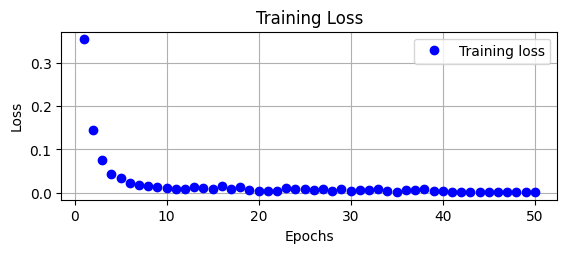

In [28]:
# Create a subplot with 2 rows and 1 column, and select the first subplot (upper part)
plt.subplot(211)

# Plot the training loss as blue dots ('bo')
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')

plt.show()


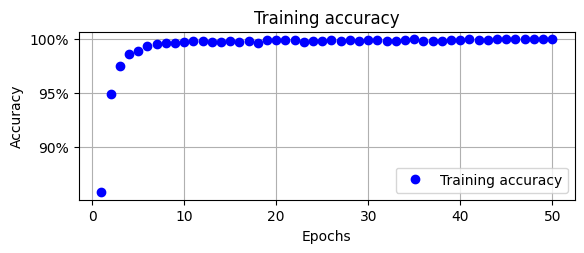

In [29]:
# Create a subplot with 2 rows and 1 column, and select the second subplot (lower part)
plt.subplot(212)

# Plot the training accuracy as blue dots ('bo')
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Format the y-axis tick labels to display percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid(False)

plt.show()


---

## **Anecdotes**

In [30]:
def get_sentiment(model, text) -> str:
    # Convert the input text to a list of integers using the text_to_int function
    text_int_embedding = text_to_int(text, word_to_int)
    
    # Pad the list of integers to match the sequence length
    text_int_embedding = pad_sequences(maxlen=sequence_length, sequences=[text_int_embedding], padding="post", value=0)
    
    # Predict the sentiment using the model and get the index of the predicted class
    sentiment_index = np.argmax(model.predict(text_int_embedding))
    
    # Return the sentiment index as a string
    return sentiment_index


In [31]:
# Use the trained model to make predictions on the test data (X_test)
# The result will be an array of predicted sentiment labels
result = np.argmax(model.predict(X_test), axis=1)


109/109 [==============================] - 1s 5ms/step


In [32]:
# Create a list of positive sentences by iterating through the test data
# and selecting sentences for which the model's prediction is labeled as 1 (positive sentiment)
positive_sentences = [int_to_text(embedding, int_to_word) for i, embedding in enumerate(X_test) if result[i] == 1]


In [33]:
# Create a list of negative sentences by iterating through the test data
# and selecting sentences for which the model's prediction is labeled as 0 (negative sentiment)
negative_sentences = [int_to_text(embedding, int_to_word) for i, embedding in enumerate(X_test) if result[i] == 0]


In [34]:
positive_sentences[:5]

['jetblue flight flight booking problems experience pretty great',
 'southwestair leeannhealey yeah sale fares got places fly oh damn right live swa fly',
 'jetblue news gate options',
 'jetblue utah think thanks',
 'united flight new york love quality planes united wtf crappy aviation newyork http co zv6cfpohl5']

In [35]:
negative_sentences[:5]

['usairways glad airline going swallowed american american always picks phone solves problems',
 'southwestair disconnected call 2 5 hours without even speaking octaviannightmare',
 'americanair well done taken fun air travel phlairport',
 'usairways told coded upgrade clearly purchased seat miles refuse downgrade ripoff',
 'rt virginamerica met match got status another airline upgrade restr http co rhkamx9vf5 http co pyalebgkjt']

---

## Generating Text

### Overview

To generate text, we will follow the following strategy:

1. **Data Import:** We'll start by importing Project Gutenberg's dataset of "Alice's Adventures in Wonderland," which can be downloaded [here](https://www.gutenberg.org/files/11/11-0.txt).

2. **Data Preprocessing:** We'll preprocess the text data by converting all text to lowercase and removing punctuation.

3. **Vocabulary Building:** We'll construct a vocabulary by counting the occurrences of unique words in the text. Words will be sorted based on frequency, and each word will be assigned a unique index.

4. **Sequence Generation:** To train our model, we need input-output pairs in the form of sequences. We'll use a sliding window approach to create input sequences and their subsequent output words.

5. **Data Encoding:** To feed data into the LSTM model, we'll encode input and output sequences. One-hot encoding will be used to represent words as binary vectors, indicating their presence in the sequence.

6. **Model Architecture:** Our model will consist of an LSTM layer, a dense (fully connected) layer, and a softmax activation function. This architecture enables the model to learn patterns and generate text.

7. **Training the Model:** The model will be trained using input-output pairs from the text data. It learns to minimize the difference between predicted and actual outputs using an optimizer (e.g., Adam) and a loss function (categorical cross-entropy).

8. **Generating Text:** To generate text, we provide a seed sequence to the trained model. The model predicts the next word, appends it to the input sequence, and repeats the process. This iterative prediction allows us to generate text that follows the style and patterns learned during training.

### Detailed Steps

- **Input Preparation:**
    - Convert text to lowercase and remove non-alphanumeric characters.
    - Split the text into individual words.

- **Vocabulary Building:**
    - Build a vocabulary by counting unique word occurrences.
    - Assign unique indices to words.

- **Sequence Generation:**
    - Use a sliding window approach to create input-output pairs.
    - Slide the window with a specified step size.

- **Encoding the Data:**
    - Apply one-hot encoding to represent words as binary vectors.
    - Convert input data to a 3D array and output data to a 2D array.

- **Model Architecture:**
    - Construct a many-to-one LSTM model.
    - Use input and LSTM layers to capture temporal dependencies.
    - Employ a dense layer with a softmax activation function.

- **Training the Model:**
    - Train the model using input-output pairs.
    - Minimize the difference between predicted and actual outputs.
    - Update model parameters with an optimizer and a loss function.

- **Generating Text:**
    - Provide a seed sequence to the model.
    - Predict the next word iteratively based on the input.
    - Append the predicted word to the input sequence to generate subsequent words.

---


In [38]:
def load_data(filename: str = '../data/alice.txt'):
    # Open the specified file for reading
    with open(filename, encoding='utf-8-sig') as fin:
        lines = []
        for line in fin:
            # Strip leading and trailing whitespace, and convert the line to lowercase
            line = line.strip().lower()
            
            # Check if the line is empty, and if so, skip it
            if (len(line) == 0):
                continue
            
            # Append the processed line to the list of lines
            lines.append(line)
        
        # Close the file
        fin.close()
        
        # Combine the lines into a single string with spaces in between
        text = " ".join(lines)
    
    # Return the concatenated text
    return text


In [39]:
text = load_data()

In [40]:
text[3001:3500]

'moment to think about stopping herself before she found herself falling down a very deep well. either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. first, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps '

Normalize the text to remove punctuations and convert it to lowercase



In [41]:
def pre_process(text: str) -> str:
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters and replace them with spaces
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    
    # Return the preprocessed text
    return text


Assign the unique words to an index so that they can be referenced when constructing the training and test datasets 

In [42]:
# Create a Counter to count the frequency of each word in the text
counts = Counter()

# Update the counter with the words in the text (text.split() splits the text into words)
counts.update(text.split())

# Create a list of unique words (sorted by frequency, in descending order)
words = sorted(counts, key=counts.get, reverse=True)

# Calculate the total number of words in the text
nb_words = len(text.split())

# Create a word-to-index mapping (word2index) and an index-to-word mapping (index2word)
word2index = {word: i for i, word in enumerate(words)}
index2word = {i: word for i, word in enumerate(words)}


### Preparing the Data

In [43]:
SEQLEN = 10
STEP = 1

Construct the input set of words that leads to an output word. Note that we are considering a sequence of 10 words and trying to predict the 11th word


In [44]:
def get_input_and_labels(text: str, seq_length: int = SEQLEN, step: int = STEP):
    # Initialize empty lists to store input and label sequences
    input_words = []
    label_words = []

    # Split the input text into words
    text_arr = text.split()

    # Iterate through the text to create sequences
    for i in range(0, nb_words - seq_length, step):
        # Extract an input sequence of length 'seq_length'
        x = text_arr[i:(i + seq_length)]
        
        # Extract the next word as the label for the input sequence
        y = text_arr[i + seq_length]

        # Append the input sequence and its corresponding label to the lists
        input_words.append(x)
        label_words.append(y)

    return input_words, label_words


In [45]:
# Generate input and label sequences for text generation
input_words, label_words = get_input_and_labels(text)

In [46]:
# Print an example input sequence and its corresponding output label
print(f'Input: {" ".join(input_words[0])}\nOutput: {label_words[0]}')


Input: the project gutenberg ebook of alice’s adventures in wonderland, by
Output: lewis


Construct the vectors of the input and the output datasets:

In [47]:
# Calculate the total number of unique words in the vocabulary
total_words = len(set(words))

# Initialize an array X for input sequences and an array y for labels
X = np.zeros((len(input_words), SEQLEN, total_words), dtype=bool)
y = np.zeros((len(input_words), total_words), dtype=bool)


We are creating empty arrays in the preceding step, which will be populated in the following code:

In [48]:
# Iterate through input sequences and labels to create one-hot encoded vectors
for i, input_word in enumerate(input_words):
    for j, word in enumerate(input_word):
        # Set the corresponding position in X to 1 for the input word
        X[i, j, word2index[word]] = 1
        
        # Set the corresponding position in y to 1 for the label word
        y[i, word2index[label_words[i]]] = 1


In the preceding code, the first for loop is used to loop through all the words in the input sequence of words (10 words in input), and the second for loop is used to loop through an individual word in the chosen sequence of input words. Additionally, given that the output is a list, we do not need to update it using the second for loop (as there is no sequence of IDs)

In [49]:
print(f'Input of X: {X.shape}\nInput of y: {y.shape}')

Input of X: (29584, 10, 5649)
Input of y: (29584, 5649)


### Defining the Model

In [50]:
# Constants for text generation
HIDDEN_SIZE = 128  # Hidden layer size
BATCH_SIZE = 32  # Batch size
NUM_ITERATIONS = 100  # Total training iterations
NUM_EPOCHS_PER_ITERATION = 1  # Epochs per iteration
NUM_PREDS_PER_EPOCH = 100  # Predictions per epoch


In [51]:
# Create a Sequential model
model = Sequential()

# Add an LSTM layer with specified HIDDEN_SIZE
model.add(LSTM(HIDDEN_SIZE, return_sequences=False, input_shape=(SEQLEN, total_words)))

# Add a Dense layer with 'softmax' activation function
model.add(Dense(total_words, activation='softmax')

# Compile the model using 'adam' optimizer and 'categorical_crossentropy' loss
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Print the model summary to display its architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               2958336   
                                                                 
 dense_1 (Dense)             (None, 5649)              728721    
                                                                 
Total params: 3,687,057
Trainable params: 3,687,057
Non-trainable params: 0
_________________________________________________________________


**Fit the model**. 
- Look at how the output varies over an increasing number of epochs. 
- Generate a random set of sequences of 10 words and try to predict the next possible word. 
- We are in a position to observe how our predictions are getting better over an increasing number of epochs

In [52]:
def check_model_output(model, preds: int, input_words, seq_length, total_words):
    # Randomly select an input sequence for text generation
    test_idx = np.random.randint(int(len(input_words) * 0.1)) * (-1)
    test_words = input_words[test_idx]

    for curr_pred in range(preds):
        # Initialize an empty embedding for the current sequence
        curr_embedding = np.zeros((1, seq_length, total_words))

        # Set the corresponding position to 1 for each word in the input sequence
        for i, ch in enumerate(test_words):
            curr_embedding[0, i, word2index[ch]] = 1

        # Predict the next word using the model
        pred = model.predict(curr_embedding, verbose=0)[0]
        word_pred = index2word[np.argmax(pred)]

        # Print the generated prediction and the input sequence
        print("=" * 50)
        print(f"Prediction {curr_pred + 1} of {preds}")
        print(f'Generating from seed: {" ".join(test_words)}\nNext Word: {word_pred}')
        print("=" * 50)

        # Update the input sequence with the predicted word for the next iteration
        test_words = test_words[1:] + [word_pred]


In [ ]:
for iteration in range(50):
    # Train the model using the input sequences (X) and labels (y)
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION, validation_split=0.1)
    
    if iteration % 10 == 0:
        # Generate text predictions every 10 iterations
        check_model_output(model, 5, input_words, SEQLEN, total_words)


In [54]:
def predict_next_word(model, input_text: str, seq_length, total_words, temperature=None):
    # Initialize an empty embedding for the current sequence
    curr_embedding = np.zeros((1, seq_length, total_words))
    
    for i, ch in enumerate(input_text):
        # Set the corresponding position to 1 for each word in the input sequence
        curr_embedding[0, i, word2index[ch]] = 1
    
    # Predict the next word using the model
    pred = model.predict(curr_embedding, verbose=0)[0]
    
    if temperature is None:
        # If no temperature is specified, select the word with the highest probability
        word_pred = index2word[np.argmax(pred)]
    else:
        # If a temperature is specified, sample the next word based on the temperature
        next_word_token = tf.random.categorical(tf.expand_dims(pred / temperature, 0), num_samples=1)[-1, 0].numpy()
        word_pred = index2word[next_word_token]
    
    return pred, word_pred


---

## The Challenge of Text Generation

Language is a dynamic and ever-evolving system. The task of text generation in natural language processing faces several challenges due to the fluid nature of language. Key considerations include:

- **Context Dependency:** The choice of the next word in a sentence heavily relies on the context established by previous words. The meaning and relevance of words are intricately tied to the preceding text.

- **Variety of Vocabulary:** Natural language employs a vast and diverse vocabulary. Multiple words often exist with similar meanings, and the selection of one over the other can impact style and nuance.

- **Non-Stationarity:** Language is not stationary; it evolves over time, reflecting shifts in culture, trends, and linguistic norms. Text generation models must adapt to these changes.

---


In [55]:
test_words = input_words[-28701]
print(' '.join(test_words))

among the people that walk with their heads downward! the


In [56]:
# Predict the next word using the 'model' with input 'test_words'.
logits, word_pred = predict_next_word(model, test_words, SEQLEN, total_words)


In [57]:
print(f'Predicted word: {word_pred}')

Predicted word: time


In [58]:
def generate_paragraph(model, seed, words: int, temperature: int):
    # Initialize the 'full_text' with the 'seed' content.
    full_text = seed.copy()
    
    # Generate the specified number of 'words'.
    for _ in range(words):
        # Predict the next word based on the 'model', 'seed' input, and temperature.
        logits, word_pred = predict_next_word(model, seed, SEQLEN, total_words, temperature=temperature)
        
        # Update the 'seed' for the next iteration by adding the predicted word and keeping only the last 10 words.
        seed = (seed + [word_pred])[-10:]
        
        # Append the predicted word to the 'full_text'.
        full_text = full_text + [word_pred]
    
    # Return the generated 'full_text'.
    return full_text


In [ ]:
# Generate and print 5 paragraphs, each with 12 words, using 'model' and 'test_words' as the initial seed.
for _ in range(5):
    paragraph = generate_paragraph(model, test_words, 12, None)
    print(' '.join(paragraph))


---

## **Randomness through Entropy Scaling**

### What is Entropy in Machine Learning?

## Understanding Entropy in Machine Learning

In machine learning, entropy serves as a measure of disorder or uncertainty within a given dataset or system. It quantifies the information content present and plays a significant role in evaluating the effectiveness of models for making accurate predictions. Entropy relies on the concept of probability and is computed using the formula:

```
Entropy = -Σ (p * log2(p))
```

Here, "p" represents the probability of each possible outcome.

### Application in Decision Trees

In the context of decision trees, entropy is a valuable tool. It aids in determining the optimal splits at each node of the tree, which, in turn, enhances the model's overall accuracy. This is particularly useful in classification tasks.

### An Example: Coin Flipping

To grasp the concept of entropy, consider the simple example of flipping a coin. When we flip a coin, there are two potential outcomes: heads or tails. However, due to the inherent randomness involved, it's challenging to precisely predict the outcome. In such situations where the probabilities of each outcome are equal (e.g., 50% heads and 50% tails), entropy is high.

Entropy, in this context, reflects the uncertainty or disorder associated with the coin flip and serves as a fundamental concept in machine learning, guiding decisions and predictions in scenarios with varying levels of uncertainty.


In [60]:
sorted(logits, reverse=True)[:5]

[0.06757716, 0.0514937, 0.02583243, 0.023227636, 0.014906152]

---

## Softmax Temperature

Temperature is a hyperparameter of LSTMs (and neural networks generally) used to control the randomness of predictions by scaling the logits before applying softmax. Temperature scaling has been widely used to improve performance for NLP tasks that utilize the Softmax decision layer.

![Example Softmax Image](./images/example_softmax_1.png)
<center> 
  <sub>Image: Example Softmax Distribution</sub> 
</center>

The generated sequence will have a predictable and generic structure. And the reason is less entropy or randomness in the softmax distribution, in the sense that the likelihood of a particular word (corresponding to index 9 in the above example) getting chosen is way higher than the other words. A sequence being predictable is not problematic as long as the aim is to get realistic sequences. But if the goal is to generate a novel text or an image which has never been seen before, randomness is the holy grail.

![Temperature vs No Temperature](./images/temp_vs_no_temp.png)
<center> 
  <sub>Image: Impact of Temperature on Softmax Distribution</sub> 
</center>

![Temperature Animation](./images/temp_animation.gif)
<center> 
  <sub>Image: Temperature Animation</sub> 
</center>

The distribution above approaches uniform distribution giving each word an equal probability of getting sampled out, thereby rendering a more creative look to the generated sequence. Too much creativity isn’t good either. In the extreme case, the generated text might not make sense at all. Hence, like all other hyperparameters, this needs to be tuned as well.

---


## Predicting using the Temperature

In [61]:
# Generate and print 5 paragraphs, each with 12 words, with a temperature of 10.
for _ in range(5):
    paragraph = generate_paragraph(model, test_words, 12, 10)
    print(' '.join(paragraph))


among the people that walk with their heads downward! the alone court,” to.” pop sits bursting particularly “just conversation. pie—” fairly,” pressing
among the people that walk with their heads downward! the i. stole gloves, talk. non-profit trumpet rabbit! pink cartwheels, saucepan ran, forepaws
among the people that walk with their heads downward! the hearts, them—“i professor yet invited,” states, room ridiculous (or takes “at hopeful
among the people that walk with their heads downward! the pool complying reaching tittered he’ll guard bowed baby; nibbling flat chimneys then—i
among the people that walk with their heads downward! the off. broken. by: hearts, doth slates, timidly life! offended!” _proves_ porpoise.” mallets


---

## Conclusion

In this project, we embarked on an exciting journey into sentiment analysis and text generation using many-to-one LSTMs. We began by delving into sentiment detection, where we trained an LSTM model to analyze airline sentiments based on text reviews. Through meticulous data preprocessing, the use of a bag-of-words representation, and the implementation of the many-to-one LSTM architecture, we achieved impressive accuracy in predicting sentiment labels.

Shifting our focus to text generation, we harnessed the timeless literary masterpiece "Alice's Adventures in Wonderland" to train our many-to-one LSTMs for generating contextually relevant text. We confronted the challenges of text generation, including dealing with language variability and selecting appropriate words. To fine-tune our text generation, we employed techniques such as entropy scaling and softmax temperature control, allowing us to strike a balance between randomness and diversity in the generated text.

Throughout this project, we explored a plethora of concepts and techniques, ranging from the intricacies of preprocessing textual data to the training and evaluation of LSTM models. We developed a deep understanding of sentiment analysis, recognizing its significance in deciphering sentiments within textual data. Furthermore, we delved into the subtleties of text generation, sharpening our skills in next-word prediction and crafting coherent sentences.

---


## **Questions and Answers**

1. **Explain the concept of a bag-of-words representation and its role in sentiment analysis.**

   A bag-of-words representation is a way to turn text into a list of words without considering their order. It helps in sentiment analysis by counting how often specific words appear in a text. This count can give insights into the overall sentiment, as certain words are associated with positive or negative feelings.

2. **How does the preprocessing of textual data help in improving sentiment analysis results?**

   Text data preprocessing involves tasks like removing punctuation and lowercasing words. It helps by making the text more consistent and removing noise, which can lead to better sentiment analysis results.

3. **Describe the steps involved in training an LSTM model for sentiment analysis.**

   Training an LSTM for sentiment analysis involves three main steps: data preparation (like turning text into numbers), model building (creating the LSTM architecture), and training (teaching the model to predict sentiment based on the data).

4. **What is the purpose of the softmax activation function in the output layer of the LSTM model?**

   The softmax function assigns probabilities to different sentiment classes. It helps the model decide which sentiment category the input text most likely belongs to.

5. **How do you evaluate the performance of an LSTM model in sentiment analysis?**

   Model performance is assessed using metrics like accuracy, precision, recall, and F1-score. These metrics measure how well the model predicts sentiment labels.

6. **Explain the challenges associated with text generation using many-to-one LSTMs.**

   Challenges in text generation include making text sound coherent, avoiding repetition, and generating contextually relevant content. Many-to-one LSTMs must overcome these hurdles to create meaningful text.

7. **What role does data preprocessing play in text generation using many-to-one LSTMs?**

   Data preprocessing in text generation helps in cleaning and structuring the input text. This ensures that the model receives high-quality data, leading to better generated text.

8. **Describe the steps involved in generating new text using a trained LSTM model.**

   To generate text, the model starts with a seed word or phrase. It predicts the next word based on the seed and continues predicting words until the desired length is reached, creating a coherent sequence.

9. **What is the purpose of entropy scaling in text generation? How does it impact the generated text?**

   Entropy scaling adjusts the randomness in text generation. Higher entropy means more randomness, potentially leading to incoherent text. Lower entropy makes the text more deterministic and less creative.

10. **Explain the concept of softmax temperature and its role in controlling prediction randomness.**

    Softmax temperature controls the diversity of predictions. A higher temperature leads to more randomness, while a lower temperature results in more deterministic predictions.

11. **How can you ensure that the generated text is contextually relevant and coherent?**

    Ensuring contextually relevant and coherent text involves training on a large, diverse dataset and using techniques like attention mechanisms to help the model focus on relevant context.

12. **What techniques can be used to improve the diversity and creativity of the generated text?**

    Techniques like adjusting the softmax temperature, increasing the model's complexity, and fine-tuning the training process can enhance text diversity and creativity.

13. **Discuss the trade-off between randomness and coherence in text generation using LSTMs.**

    Balancing randomness and coherence is challenging. More randomness can lead to creative but incoherent text, while more coherence may make the text less diverse. It's a trade-off that needs careful tuning.

14. **How can you handle out-of-vocabulary words when training an LSTM model for text generation?**

    Handling out-of-vocabulary words involves adding them to the training data or using techniques like subword tokenization to ensure the model can generate text containing those words.

15. **What are the limitations of using many-to-one LSTMs for text generation?**

    Many-to-one LSTMs might struggle with capturing long-term dependencies in text. They can also produce text that is repetitive or lacks detailed context.

16. **How can you handle long-term dependencies in text generation using LSTMs?**

    Long-term dependencies can be addressed by using more advanced LSTM architectures, like those with attention mechanisms, or by training on more extensive datasets to capture a broader context.

17. **Discuss the impact of different hyperparameters on the performance of LSTM models in text generation.**

    Hyperparameters, like the learning rate and the model's complexity, greatly affect text generation. Finding the right balance is crucial for optimal performance.

---